# Adjoint optimization of exponential growth model
    - This is a demonstration of a simple adjoint model
    - The model is based on Euler-forward scheme of net growth rate (a)
    - x(n+1) = (1+a*dt)*x(n)
    - We generate a hypothetical "observation" xobs(t) with random noise
    - We don't know what is the true (a) and x(0)
    - We will search this value iteratively

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# forward model
def forward(t,x,dt,a):
    dx = dt*a*x
    return dx

In [3]:
# adjoint model
def adjoint(t,xa,a,x,xobs):
    dxa = dt*a*xa + xobs-x
    return dxa

In [4]:
# evaluate cost function
def cost(x,xobs):
    J = .5*np.sum((xobs-x)**2)
    return J

In [5]:
# Initialization
N=20     # number of time steps 
xo=.8    # assign initial condition (model)
x=np.zeros(N+1)
x[0]=xo  
a=np.log(2.)/2*.7 # assign a growth rate (model)
dt=10/N  # time step size (model period is 10 days)
t=np.arange(0,10+dt,dt)
# define synthetic observation
xobs=1.*np.exp(t*np.log(2.)/2) + np.random.normal(0,1,N+1) # true initial is 1, true a is ln2/2
# define reversed time step
Nrev = np.arange(N,0,-1)
# decent rate (between 0 and 1)
eps=.3
print('true value of a and x(0) are: '+str(np.round(np.log(2.)/2,3))+' '+str(np.round(xobs[0],3)))

true value of a and x(0) are: 0.347 0.215


iter0: the loss function is = 888.6586733015961
updated value of a and x(0) are: 0.291 1.102


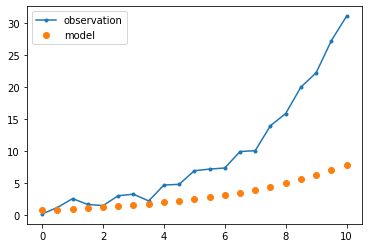

In [6]:
# forward integration, iteration 1
x[0]=xo
for n in range (N):
    dx=forward(t[n],x[n],dt,a)
    x[n+1]=x[n]+dx
#
# plot the model first guess
plt.plot(t,xobs,'.-',label='observation')
plt.plot(t,x,'o',label='model')
plt.legend()
#
# evaluate cost
J = cost(x,xobs)
print('iter0: the loss function is = '+str(J))
#
# adjoint integration
xa=np.zeros(N+1)
for n in Nrev:
    dxa=adjoint(t[n],xa[n],a,x[n],xobs[n])
    xa[n-1]=xa[n]+dxa
# evaluate gradient
dxo=-xa[0]*(1+a*dt)+(x[0]-xobs[0])
da =-np.sum(x*xa*dt) 
# update parameters
a=a-J/da*eps
xo=xo-J/dxo*eps
print('updated value of a and x(0) are: '+str(np.round(a,3))+' '+str(np.round(xo,3)))

iter1: the loss function is = 322.8440096373877
updated value of a and x(0) are: 0.306 1.229


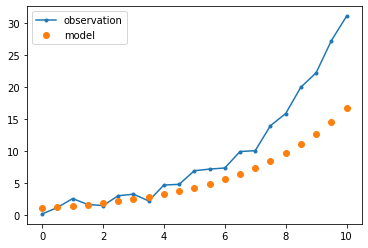

In [7]:
# forward integration, iteration 2
x=np.zeros(N+1)
x[0]=xo
for n in range (N):
    dx=forward(t[n],x[n],dt,a)
    x[n+1]=x[n]+dx
#
# plot
plt.plot(t,xobs,'.-',label='observation')
plt.plot(t,x,'o',label='model')
plt.legend()
#
# evaluate cost
J = cost(x,xobs)
print('iter1: the loss function is = '+str(J))
#
# adjoint integration
xa=np.zeros(N+1)
for n in Nrev:
    dxa=adjoint(t[n],xa[n],a,x[n],xobs[n])
    xa[n-1]=xa[n]+dxa
# evaluate gradient
dxo=-xa[0]*(1+a*dt)+(x[0]-xobs[0])
da =-np.sum(x*xa*dt) 
# update parameters
a=a-J/da*eps
xo=xo-J/dxo*eps
print('updated value of a and x(0) are: '+str(np.round(a,3))+' '+str(np.round(xo,3)))

iter2: the loss function is = 147.39838872021238
updated value of a and x(0) are: 0.315 1.308


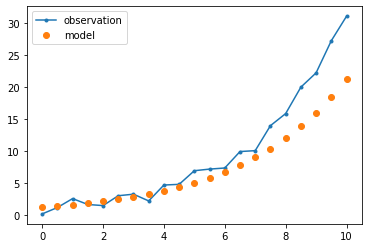

In [8]:
# forward integration, iteration 3
x=np.zeros(N+1)
x[0]=xo
for n in range (N):
    dx=forward(t[n],x[n],dt,a)
    x[n+1]=x[n]+dx
#
# plot
plt.plot(t,xobs,'.-',label='observation')
plt.plot(t,x,'o',label='model')
plt.legend()
#
# evaluate cost
J = cost(x,xobs)
print('iter2: the loss function is = '+str(J))
#
# adjoint integration
xa=np.zeros(N+1)
for n in Nrev:
    dxa=adjoint(t[n],xa[n],a,x[n],xobs[n])
    xa[n-1]=xa[n]+dxa
# evaluate gradient
dxo=-xa[0]*(1+a*dt)+(x[0]-xobs[0])
da =-np.sum(x*xa*dt) 
# update parameters
a=a-J/da*eps
xo=xo-J/dxo*eps
print('updated value of a and x(0) are: '+str(np.round(a,3))+' '+str(np.round(xo,3)))

iter3: the loss function is = 70.30664890872052
updated value of a and x(0) are: 0.32 1.362


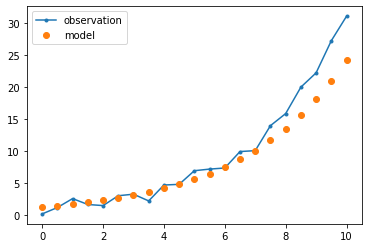

In [9]:
# forward integration, iteration 4
x=np.zeros(N+1)
x[0]=xo
for n in range (N):
    dx=forward(t[n],x[n],dt,a)
    x[n+1]=x[n]+dx
#
# plot
plt.plot(t,xobs,'.-',label='observation')
plt.plot(t,x,'o',label='model')
plt.legend()
#
# evaluate cost
J = cost(x,xobs)
print('iter3: the loss function is = '+str(J))
#
# adjoint integration
xa=np.zeros(N+1)
for n in Nrev:
    dxa=adjoint(t[n],xa[n],a,x[n],xobs[n])
    xa[n-1]=xa[n]+dxa
# evaluate gradient
dxo=-xa[0]*(1+a*dt)+(x[0]-xobs[0])
da =-np.sum(x*xa*dt) 
# update parameters
a=a-J/da*eps
xo=xo-J/dxo*eps
print('updated value of a and x(0) are: '+str(np.round(a,3))+' '+str(np.round(xo,3)))

iter4: the loss function is = 34.638541813691724
updated value of a and x(0) are: 0.323 1.402


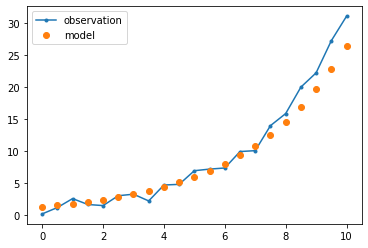

In [10]:
# forward integration, iteration 5
x=np.zeros(N+1)
x[0]=xo
for n in range (N):
    dx=forward(t[n],x[n],dt,a)
    x[n+1]=x[n]+dx
#
# plot
plt.plot(t,xobs,'.-',label='observation')
plt.plot(t,x,'o',label='model')
plt.legend()
#
# evaluate cost
J = cost(x,xobs)
print('iter4: the loss function is = '+str(J))
#
# adjoint integration
xa=np.zeros(N+1)
for n in Nrev:
    dxa=adjoint(t[n],xa[n],a,x[n],xobs[n])
    xa[n-1]=xa[n]+dxa
# evaluate gradient
dxo=-xa[0]*(1+a*dt)+(x[0]-xobs[0])
da =-np.sum(x*xa*dt) 
# update parameters
a=a-J/da*eps
xo=xo-J/dxo*eps
print('updated value of a and x(0) are: '+str(np.round(a,3))+' '+str(np.round(xo,3)))

iter5: the loss function is = 17.930635414891135
updated value of a and x(0) are: 0.326 1.438


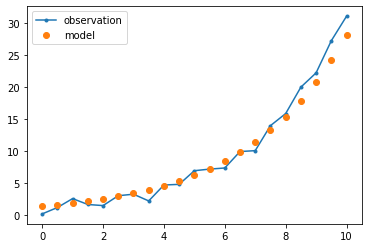

In [11]:
# forward integration, iteration 6
x=np.zeros(N+1)
x[0]=xo
for n in range (N):
    dx=forward(t[n],x[n],dt,a)
    x[n+1]=x[n]+dx
#
# plot
plt.plot(t,xobs,'.-',label='observation')
plt.plot(t,x,'o',label='model')
plt.legend()
#
# evaluate cost
J = cost(x,xobs)
print('iter5: the loss function is = '+str(J))
#
# adjoint integration
xa=np.zeros(N+1)
for n in Nrev:
    dxa=adjoint(t[n],xa[n],a,x[n],xobs[n])
    xa[n-1]=xa[n]+dxa
# evaluate gradient
dxo=-xa[0]*(1+a*dt)+(x[0]-xobs[0])
da =-np.sum(x*xa*dt) 
# update parameters
a=a-J/da*eps
xo=xo-J/dxo*eps
print('updated value of a and x(0) are: '+str(np.round(a,3))+' '+str(np.round(xo,3)))